## Autoregression Model 
 In this model we predict the future value based on past values.A regression model, such as linear regression, models an output value based on a linear combination of input values.
>   yhat=b0+b1*x1

<p>Same techinque can be used for the time series where input variables can be taken as previous time stepcalled **lag variables**.</p>

>    x(t+1)=b0+b1*x(t-1)+b2*x(t-2)

<p>Because the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).
    

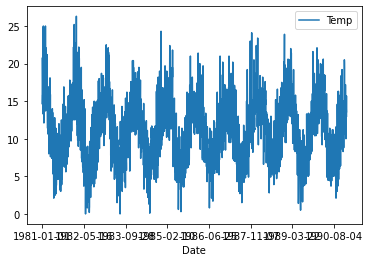

In [6]:
# Lets make AR model
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("daily-min-temperatures.txt", header=0, index_col=0)
df.plot()
plt.show()

In [7]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Checking autocorrelation
We can plot the observation at the previous time step (t-1) with the observation at the next time step (t+1) as a scatter plot.

This could be done manually by first creating a lag version of the time series dataset and using a built-in scatter plot function in the Pandas library.

But there is an easier way.

Pandas provides a built-in plot to do exactly this, called the lag_plot() function.

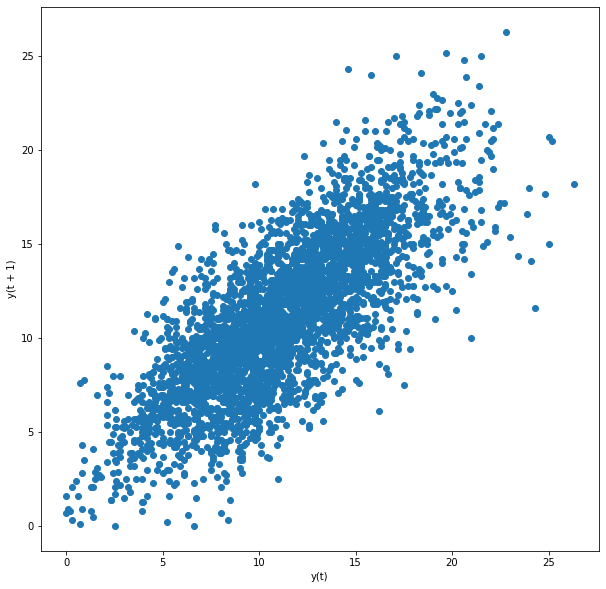

In [34]:
from pandas import plotting
plt.figure(figsize=(10,10))
lag_plot(df)
plt.show()

In [15]:
help(lag_plot)

Help on function lag_plot in module pandas.plotting._misc:

lag_plot(series, lag=1, ax=None, **kwds)
    Lag plot for time series.
    
    Parameters
    ----------
    series : Time series
    lag : lag of the scatter plot, default 1
    ax : Matplotlib axis object, optional
    **kwds
        Matplotlib scatter method keyword arguments.
    
    Returns
    -------
    class:`matplotlib.axis.Axes`
    
    Examples
    --------
    
    Lag plots are most commonly used to look for patterns in time series data.
    
    Given the following time series
    
    .. plot::
        :context: close-figs
    
        >>> np.random.seed(5)
        >>> x = np.cumsum(np.random.normal(loc=1, scale=5, size=50))
        >>> s = pd.Series(x)
        >>> s.plot()
    
    A lag plot with ``lag=1`` returns
    
    .. plot::
        :context: close-figs
    
        >>> pd.plotting.lag_plot(s, lag=1)



We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.
We could manually calculate the correlation values for each lag variable and plot the result. Thankfully, Pandas provides a built-in plot called the autocorrelation_plot() function.

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

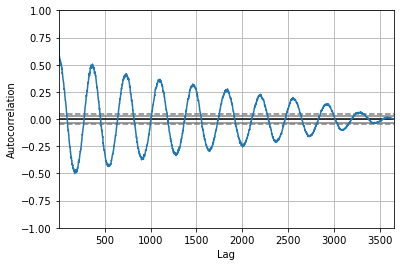

In [13]:
plotting.autocorrelation_plot(df)
plt.show()

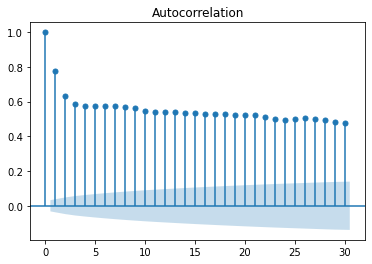

In [40]:
#The statsmodels library also provides a version of the plot in the plot_acf() function as a line plot.
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=30)
plt.show()
#We will focus on the points that lie beyond the blue region as they signify strong statistical significance.

In [30]:

values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)


         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


Test MSE: 3.423


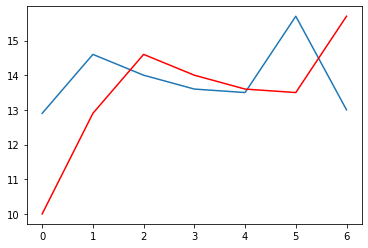

In [47]:
# lets make a baseline model.
#Let’s say that we want to develop a model to predict the last 7 days of minimum temperatures in the dataset given all prior observations.
from sklearn import metrics
x=dataframe.values
train,test=x[1:len(x)-7],x[len(x)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
#The simplest model that we could use to make predictions would be to persist the last observation.
#We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an autoregression model.

def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = metrics.mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

An autoregression model is a linear regression model that uses lagged variables as input variables.

We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use.

Alternately, the statsmodels library provides an autoregression model where you must specify an appropriate lag value and trains a linear regression model. It is provided in the AutoReg class.

We can use this model by first creating the model AutoReg() and then calling fit() to train it on our dataset. This returns an AutoRegResults object.

Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. This creates 1 7-day forecast, which is different from the persistence example above.

Coefficients: [ 5.56429955e-01  5.88555340e-01 -9.08389232e-02  4.82525824e-02
  4.01288308e-02  3.93509765e-02  2.59094346e-02  4.46634788e-02
  1.27688308e-02  3.72271892e-02 -6.35909322e-04  4.68955775e-03
  1.83987037e-02  2.71527420e-02  5.38687107e-04  2.47899856e-02
  7.60649959e-03  9.95186007e-03  3.41614572e-02 -9.24670710e-03
  2.41985731e-02  1.88262568e-02  1.23166395e-02 -1.86042650e-02
 -1.78407089e-03  1.67121327e-02  1.97846130e-02  9.73045836e-03
  6.31625219e-03 -1.28563784e-03 -1.79066328e-04]
predicted=11.871688, expected=12.900000
predicted=13.052959, expected=14.600000
predicted=13.532909, expected=14.000000
predicted=13.244517, expected=13.600000
predicted=13.091894, expected=13.500000
predicted=13.147498, expected=15.700000
predicted=13.177283, expected=13.000000
Test RMSE: 1.225


C:\Users\Naina\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


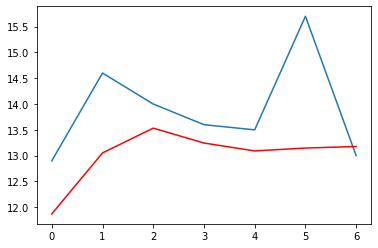

In [53]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
# train autoregression
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]
model = AutoReg(train, lags=30)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(metrics.mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()